In [ ]:
# references:
# https://scitools.org.uk/cartopy/docs/latest/ 
# https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
# https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb
# https://towardsdatascience.com/plotting-geospatial-data-with-cartopy-4b5ad0da0761

# advanced
# https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy

#install steps
!apt-get install libproj-dev proj-bin proj-data
!apt-get install libgeos-dev

# shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
!pip uninstall -y shapely
!pip install --no-binary shapely shapely
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (54.5 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

In [ ]:
import cartopy
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
import matplotlib.pyplot as plt
import pandas

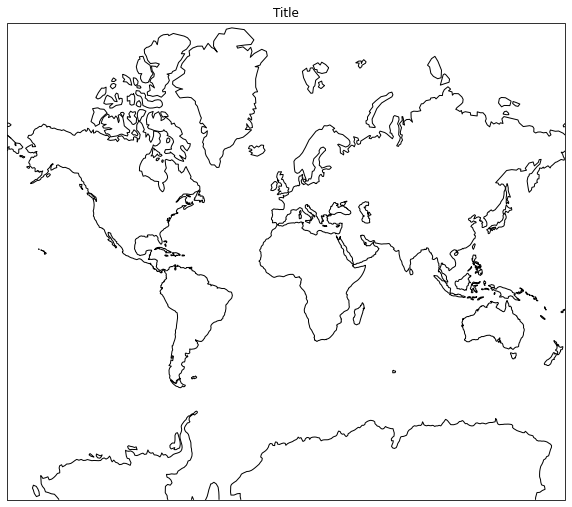

In [ ]:
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("Title")                        # label it

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
projections = [ccrs.PlateCarree(), ccrs.Robinson(), ccrs.Mercator(), ccrs.Orthographic(), ccrs.InterruptedGoodeHomolosine()]

numbers = [1,2,3,4,5]
letters = ['a', 'b', 'c']
first_letter = letters[0]
second_letter = letters[1]

print(first_letter, second_letter)

a b


In [ ]:
for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

In [ ]:
central_lon = -10
central_lat = 50
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='10m')

In [ ]:
#use a different projection
ax = plt.axes(projection = ccrs.PlateCarree())  
ax.add_feature(cf.COASTLINE)                    
ax.set_title("Title")                           

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

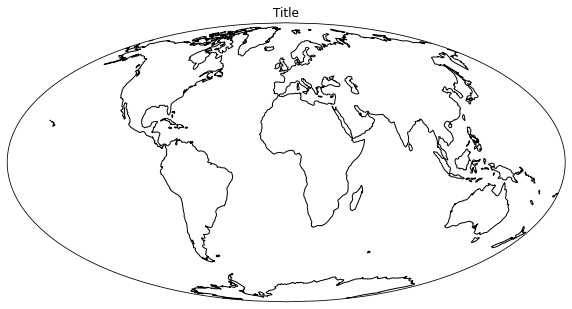

In [ ]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.add_feature(cf.COASTLINE)                    
ax.set_title("Title")                           

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
# one month of seismic data from early 2019
data = pandas.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/quakes.csv")

# uncomment the line below instead to use live data updated every 15 minutes
#data = pandas.read_csv("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

data.head(5) # choose to show the first (how many) lines of the file

,time,latitude,longitude,depth,magnitude
0,2019-04-20T13:23:55.300Z,32.744499,-115.854500,4.72,1.76
1,2019-04-20T13:22:10.930Z,33.587000,-116.806000,9.19,0.29
2,2019-04-20T13:11:00.410Z,36.378667,-118.074500,8.22,0.88
3,2019-04-20T12:57:56.070Z,33.188167,-116.416833,10.76,0.95
4,2019-04-20T12:50:04.825Z,60.124200,-147.142500,16.40,2.20


In [ ]:
# more cartopy imports
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#create the setup
fig, ax = plt.subplots(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # try centering the map somewhere else
ax.set_global()

ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# make the scatterplot
plotdata = data.query('depth > 0') #depth is in km
x = plotdata['longitude']
y = plotdata['latitude']
ax.scatter(x,y,s=2, zorder=10, color='black',transform=ccrs.PlateCarree())
ax.set_title('Title!')
ax.set_xlabel('label me')
ax.set_ylabel('me, too!')
plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


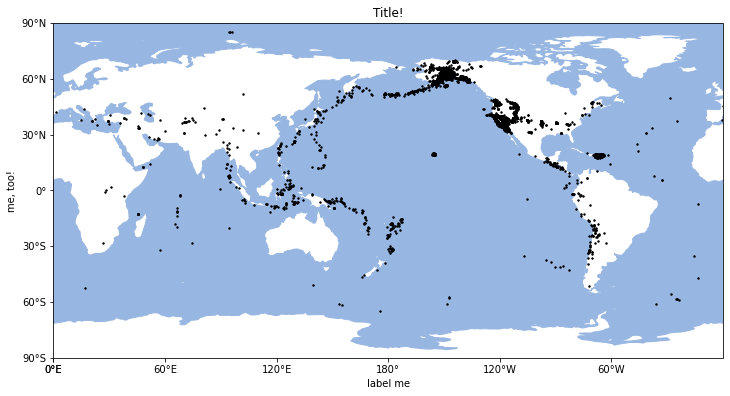

In [ ]:
# this time with the oceans

#create the setup
fig, ax = plt.subplots(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # try centering the map somewhere else
ax.set_global()

ax.add_feature(cfeature.OCEAN)

ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# make the scatterplot
plotdata = data.query('depth > 0') #depth is in km
x = plotdata['longitude']
y = plotdata['latitude']
ax.scatter(x,y,s=2, zorder=10, color='black',transform=ccrs.PlateCarree())
ax.set_title('Title!')
ax.set_xlabel('label me')
ax.set_ylabel('me, too!')
plt.show()

In [ ]:
#https://towardsdatascience.com/plotting-geospatial-data-with-cartopy-4b5ad0da0761

import pandas
# Read the data
df = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/master/airports.csv")

In [ ]:
import matplotlib.pyplot as plt

#show the airport in the US based on the kaggle dataset loaded above
figure = plt.figure(figsize=(18,16))
ax = figure.add_subplot(1,1,1, projection = ccrs.PlateCarree())
#add some features
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.STATES)
#add more features here...
ax.add_feature(cf.LAKES, color="blue")
ax.add_feature(cf.RIVERS, edgecolor="red")

ax.set_extent([-135, -60, 20, 55], crs = ccrs.PlateCarree())
 
# modify the plot by adding a scatterplot over the map
plt.scatter(x=df["LONGITUDE"], y=df["LATITUDE"], color="green", s=10, alpha=0.75, transform=ccrs.PlateCarree())

plt.show()

In [ ]:
#https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())

ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cf.LAKES, color="lime")
ax.add_feature(cf.BORDERS, linestyle="--")
ax.add_feature(cf.OCEAN, color="skyblue", alpha=0.4)
ax.add_feature(cf.RIVERS, edgecolor="red")
ax.add_feature(cf.STATES)

plt.show()

In [ ]:
from cartopy.feature.nightshade import Nightshade
from datetime import datetime

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()

current_time = datetime.now()
print('it is now: ', current_time)
ax.add_feature(Nightshade(current_time, alpha=0.3))

ax.set_title('Night time shading for {}'.format(current_time))

plt.show()

In [ ]:
#map strabucks across the planet
import pandas
starbucks_locations = pandas.read_csv("https://raw.githubusercontent.com/realtechsupport/DataNarratives/fe8a221312bb77751eda94563a91fba45298073f/starbucks_info.csv")
starbucks_locations.head()

In [ ]:
# get US locations
starbucks_us = starbucks_locations[starbucks_locations["Country"] == "US"]
starbucks_us.head()

In [ ]:
# Below step will get us geospatial data for each state.
us_statewise_lat_lon = starbucks_us.groupby(by="State/Province").mean()[["Longitude", "Latitude"]]

## Below step will get us store count per state.
statewise_store_count = starbucks_us.groupby(by="State/Province").count()[["Store Number"]].rename(columns={"Store Number":"Count"})

## Below step will merge store counts dataframe with geospatial dataframe.
statewise_store_count = us_statewise_lat_lon.join(statewise_store_count).reset_index()

statewise_store_count.head()

,State/Province,Longitude,Latitude,Count
0,AK,-148.591224,61.376939,49
1,AL,-86.855529,32.995294,85
2,AR,-92.829091,35.240364,55
3,AZ,-111.879877,33.379385,488
4,CA,-119.505207,35.510578,2821


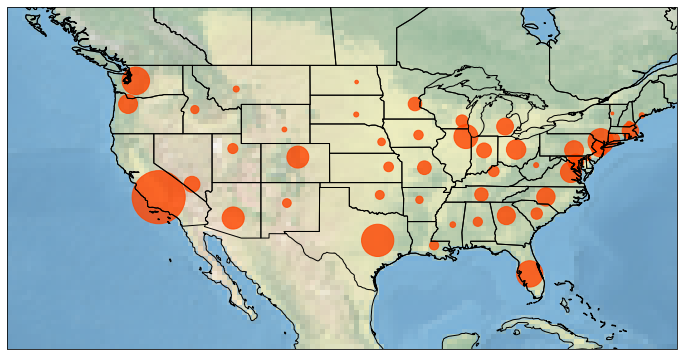

In [ ]:
#show density of stores in the US

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(cf.STATES)
ax.set_extent([-135, -66.5, 20, 55], crs=ccrs.PlateCarree()) 

plt.scatter(x=statewise_store_count.Longitude, y=statewise_store_count.Latitude,
            color="orangered",
            s=statewise_store_count.Count,
            alpha=0.8,
            transform=ccrs.PlateCarree()) 
plt.show()

In [ ]:
# multiple plots with cartopy and seaborn - including all imports required, also disregard warnings
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

import cartopy.crs
import cartopy.feature

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://gist.github.com/shoyer/16db9cd187886a3effd8
datasource = 'https://gist.githubusercontent.com/shoyer/9698df62662ca7243180/raw/c9d45b7c9acb3a47341cc8510415887f1b8f5e28/urbanareas1_1.tsv'
dataset = pandas.read_table(datasource)
#change the form of the dataset (https://www.w3resource.com/pandas/dataframe/dataframe-melt.php)
dataset = pandas.melt(dataset, id_vars=['City', 'City_Alternate', 'Country', 'Latitude', 'Longitude', 'Country_ISO3'], value_name='Population')
#convert year to an integer
dataset['Year'] = dataset['variable'].str.slice(3, 7).astype(int)
#make bins
dataset['PopulationCategory'] = pandas.cut(dataset['Population'], [0, 1000, 2000, 3000, 5000, 100000], right=False)

In [ ]:
dataset.head()

,City,City_Alternate,Country,Latitude,Longitude,Country_ISO3,variable,Population,Year,PopulationCategory
0,Sofia,NaN,Bulgaria,42.70,23.33,BGR,pop1950,520.0,1950,"[0, 1000)"
1,Mandalay,NaN,Myanmar,21.97,96.08,MMR,pop1950,170.0,1950,"[0, 1000)"
2,Nay Pyi Taw,NaN,Myanmar,19.75,96.10,MMR,pop1950,0.0,1950,"[0, 1000)"
3,Yangon,Rangoon,Myanmar,16.87,96.12,MMR,pop1950,1300.0,1950,"[1000, 2000)"
4,Minsk,NaN,Belarus,53.89,27.57,BLR,pop1950,280.0,1950,"[0, 1000)"


In [ ]:
def scatterplot_rev(x, y, s, color=None, **kwargs):
    # the default plt.scatter handles size scaling poorly, so we define a different one
    # see also: https://github.com/mwaskom/seaborn/issues/315
    scaled_size = 0.005 * s
    plt.scatter(x, y, s=scaled_size, edgecolor=color, facecolor='none', linewidth=1, **kwargs)

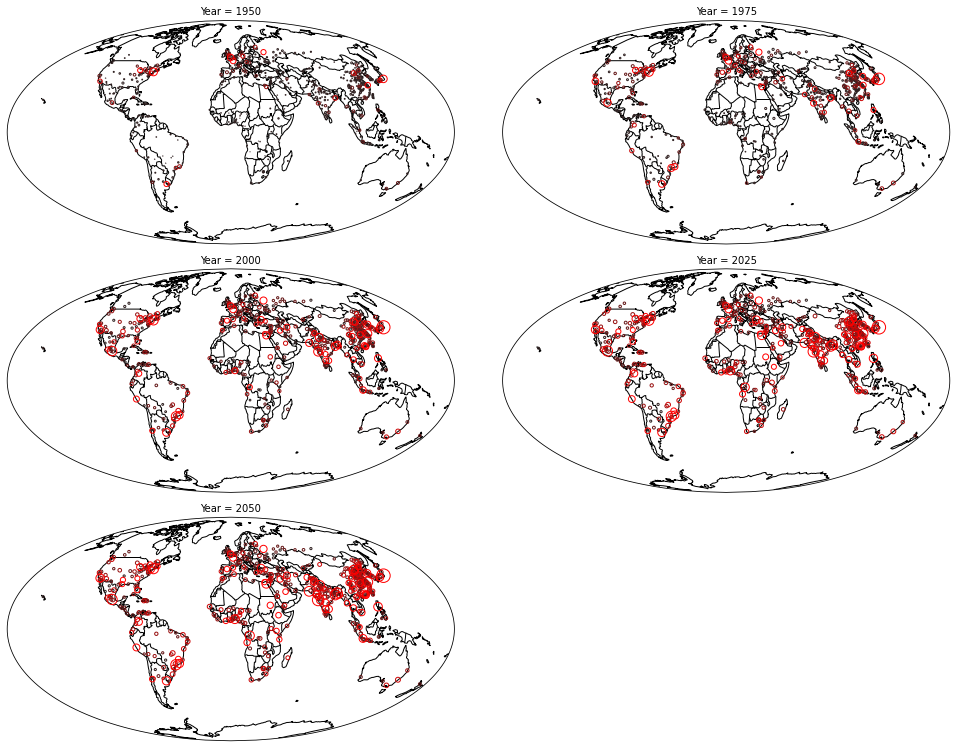

In [ ]:
# use seaborn facetgrid - its a bit tricky !
# https://www.geeksforgeeks.org/python-seaborn-facetgrid-method/
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# http://seaborn.pydata.org/tutorial/axis_grids.html#subsetting-data-with-facetgrid 


#create the facet grid
world = seaborn.FacetGrid(dataset[dataset['Year'] % 25 == 0], col="Year", hue='PopulationCategory',
                  col_wrap=2, size=3.5, aspect=2, palette=seaborn.dark_palette('Red', 5),
                  subplot_kws=dict(projection=cartopy.crs.Mollweide()))

#get rid of the x an y axis
seaborn.despine(left=True, bottom=True)

#move the graphs apart a bit
world.set(xmargin=0.25, ymargin=0.25)

#map the facet grid
world.map(scatterplot_rev, "Longitude", "Latitude", "Population", transform=cartopy.crs.PlateCarree(), zorder=10)

# The reason we have to use .ravel() is because the axes are stored in a numpy array.
# https://www.geeksforgeeks.org/numpy-ravel-python/

for ax in world.axes.ravel():
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_global()

In [1]:
# check out GeoPlot
# https://residentmario.github.io/geoplot/quickstart/quickstart.html
# https://residentmario.github.io/geoplot/plot_references/plot_reference.html

!pip install geoplot

     |████████████████████████████████| 14.4MB 272kB/s 
     |████████████████████████████████| 1.0MB 46.9MB/s 
     |████████████████████████████████| 225kB 45.7MB/s 
     |████████████████████████████████| 6.5MB 37.2MB/s 
     |████████████████████████████████| 15.3MB 304kB/s 
     |████████████████████████████████| 19.1MB 1.3MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127670 sha256=dbc96e92862b9ec7d1ebb61289658244668067f81d6825d38c19bdeea7f7e282
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=d1d39481ec0fb6c4515dbadeaf52c03154cb8cd97903b3af72614f790544162e
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [2]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp37-none-any.whl size=28556 sha256=86b05510807490b2976347c174fa5ec2629c5f5f78d2db39aa3287ec81465f35
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [1]:
!pip install geopandas

In [2]:
# simple example
import geoplot as gplt
import geopandas as gpd
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


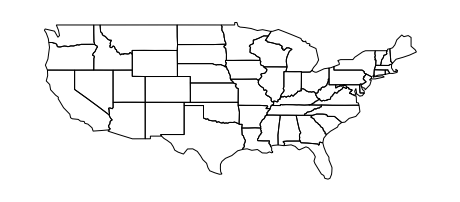

In [3]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [ ]:
import geoplot.crs as gcrs

continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

In [ ]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

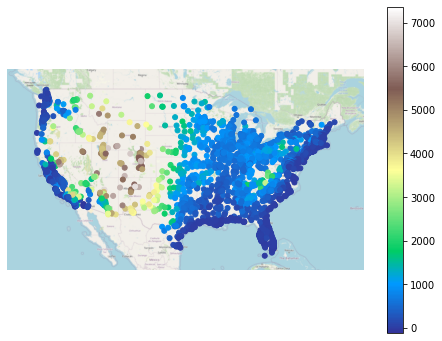

In [ ]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(),edgecolor='white', facecolor='lightgray',figsize=(12, 8))

gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', #legend=True,
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)

ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)

Text(0.5, 1.0, 'Cities in the Continental United States by Elevation')

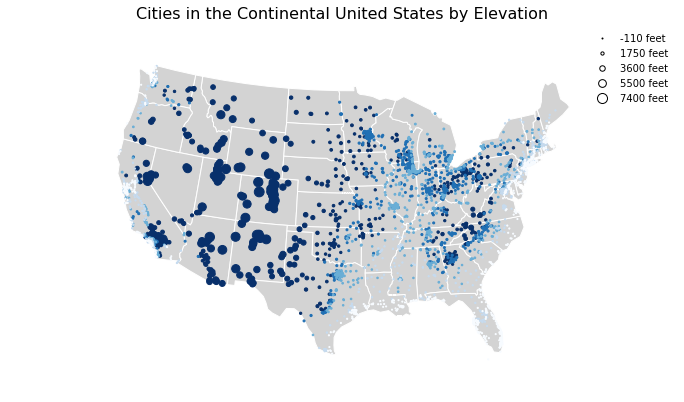

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(),edgecolor='white', facecolor='lightgray',figsize=(12, 8))

gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)

ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)

In [ ]:
#show airbnb listing in Boston in 2016

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mplleaflet

# where can you get more listings:http://insideairbnb.com/get-the-data.html
# more wrangling with airbnb data: https://github.com/migdias/boston_airbnb_analysis/blob/master/Airbnb%20-%20Data%20Analysis.ipynb

boston_airbnb_listings = gpd.read_file(gplt.datasets.get_path('boston_airbnb_listings'))


#show the data on the map
ax = gplt.polyplot(boston_airbnb_listings, projection=gcrs.WebMercator(),edgecolor='white', facecolor='lightgray',figsize=(12, 8))
gplt.pointplot(boston_airbnb_listings, s=1, color='black', ax=ax)
gplt.webmap(boston_airbnb_listings, ax=ax)
plt.title('Boston AirBnB Locations, 2016', fontsize=18)
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


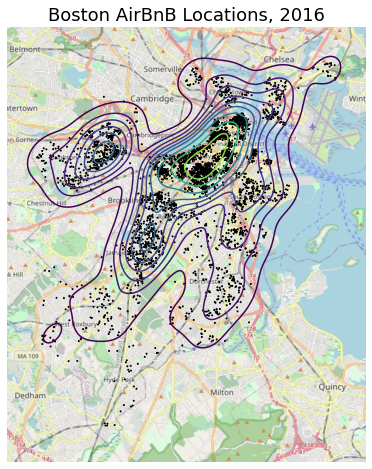

In [ ]:
#now show a frequency distribution of those listing superimposed on that same map
ax = gplt.kdeplot(boston_airbnb_listings, projection=gcrs.WebMercator(), shade = False, figsize=(12, 8))
gplt.pointplot(boston_airbnb_listings, s=1, color='black', ax=ax)
gplt.webmap(boston_airbnb_listings, ax=ax)
plt.title('Boston AirBnB Locations, 2016', fontsize=18)
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


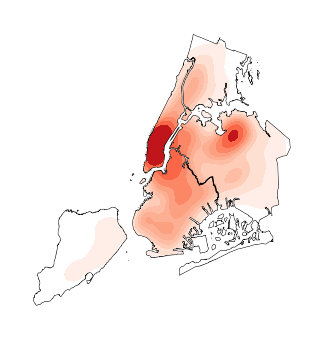

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

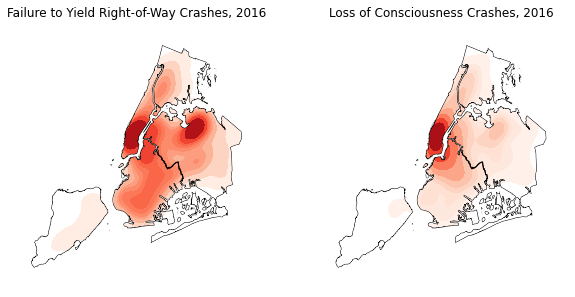

In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_collision_factors = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

#first plot
gplt.kdeplot(
    nyc_collision_factors[nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Failure to Yield Right-of-Way"],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax1
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax1)
ax1.set_title("Failure to Yield Right-of-Way Crashes, 2016")

#second plot
gplt.kdeplot(
    nyc_collision_factors[nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Lost Consciousness"],
    cmap = 'Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax2
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax2)
ax2.set_title("Loss of Consciousness Crashes, 2016")

plt.show()

In [ ]:
# more detailed data wrangling with airbnb data: https://github.com/migdias/boston_airbnb_analysis/blob/master/Airbnb%20-%20Data%20Analysis.ipynb